In [62]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0,"..")
from explore_data.query_reports import get_field


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
report_dir = "../paper_results/conll/report/9357089-B-report-enriched.json"

In [119]:
a, b = get_field(key_dic={"model_full_name":"9357089-B-da10d-9357089-B-model_2",
                          "subsample":"rates","metric":"f1-normalize", 
                           "tokenize_and_bpe":"0","layer_wise_attention":"0",
                          "data":"lex_norm2015_split_dev_2-normalize"
                  # "masking_strategy": "['norm_mask_variable','0']"
                  }, field="score", report_dir=report_dir)

FIELD score is 0.7456647398843931 for keys {'layer_wise_attention': '0', 'tokenize_and_bpe': '0', 'model_full_name': '9357089-B-da10d-9357089-B-model_2', 'data': 'lex_norm2015_split_dev_2-normalize', 'metric': 'f1-normalize', 'subsample': 'rates'} (1 reports found)


ValueError: too many values to unpack (expected 2)

In [49]:
a, report, n_reports = get_field(key_dic={#"model_full_name":"9357089-B-da10d-9357089-B-model_2", 
                         "subsample":"OOV-n-NEED_NORM",
                         "metric":"accuracy-exact-normalize", 
                         "tokenize_and_bpe":"0","layer_wise_attention":"0",
                         "data":"lex_norm2015_split_dev_2-normalize",
                         "masking_strategy": "['norm_mask_variable', '0']"
                  }, field="score", report_dir=report_dir)
a

FIELD score is 0.7602339181286549 for keys {'masking_strategy': "['norm_mask_variable', '0']", 'data': 'lex_norm2015_split_dev_2-normalize', 'tokenize_and_bpe': '0', 'layer_wise_attention': '0', 'metric': 'accuracy-exact-normalize', 'subsample': 'OOV-n-NEED_NORM'} (1 reports found)


0.7602339181286549

In [123]:
def get_pandas(score_tup_ls, shared_parameter_dic, analyse, name_ls, report_dir):
    """
    design to provide pandas for comparing only 2 models so far
    """
    to_analyse = list(analyse.keys())[0]
    pandas_ls = []
    assert len(name_ls)==len(analyse[to_analyse])
    for score in score_tup_ls: 
        for val, name in zip(analyse[to_analyse], name_ls):
            shared_parameter_dic.update({to_analyse:val})
            shared_parameter_dic.update({"subsample":score[1], "metric":score[0]})
            score_value, report, n_reports = get_field(key_dic=shared_parameter_dic,
                                                       field="score",
                                                       report_dir=report_dir)
            score_name = score[0]
            if score_name == "accuracy-exact-normalize":
                score_name = "recall-"+score[1][:-12]
            elif score_name=="f1-normalize":
                score_name = "F1"
            #pandas_ls.append([name, score_name, float("{:0.4f}".format(score_value))*100])
            pandas_ls.append([score_name, name, float("{:0.4f}".format(score_value))*100])
            assert n_reports==1
    #cols = ["model", "metric", "score"]
    cols = [ "metric","model", "score"]
    return pd.DataFrame(pandas_ls, columns=cols), cols

FIELD score is 0.7377972465581978 for keys {'masking_strategy': "['norm_mask_variable', '0']", 'data': 'lex_norm2015_test-normalize', 'tokenize_and_bpe': '1', 'layer_wise_attention': '0', 'metric': 'accuracy-exact-normalize', 'subsample': 'OOV-n-NEED_NORM'} (1 reports found)
FIELD score is 0.7528160200250313 for keys {'masking_strategy': '0', 'data': 'lex_norm2015_test-normalize', 'tokenize_and_bpe': '1', 'layer_wise_attention': '0', 'metric': 'accuracy-exact-normalize', 'subsample': 'OOV-n-NEED_NORM'} (1 reports found)
FIELD score is 0.8512696493349455 for keys {'masking_strategy': "['norm_mask_variable', '0']", 'data': 'lex_norm2015_test-normalize', 'tokenize_and_bpe': '1', 'layer_wise_attention': '0', 'metric': 'accuracy-exact-normalize', 'subsample': 'InV-n-NEED_NORM'} (1 reports found)
FIELD score is 0.8681983071342201 for keys {'masking_strategy': '0', 'data': 'lex_norm2015_test-normalize', 'tokenize_and_bpe': '1', 'layer_wise_attention': '0', 'metric': 'accuracy-exact-normalize'

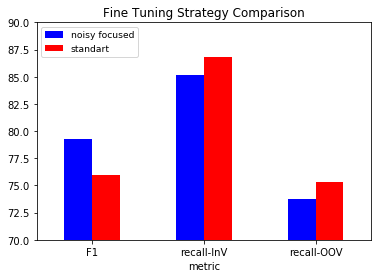

In [128]:
scores = [("accuracy-exact-normalize","OOV-n-NEED_NORM"),
          ("accuracy-exact-normalize","InV-n-NEED_NORM"),
          ("f1-normalize","rates")]
shared_parameter_dic = {"layer_wise_attention":"0", 
                        #"data":"lex_norm2015_split_dev_2-normalize", 
                        "data":"lex_norm2015_test-normalize", 
                        "tokenize_and_bpe": "1"
                       }
analyse = {"masking_strategy":["['norm_mask_variable', '0']","0"]}

pd_frame, cols =get_pandas(score_tup_ls=scores, shared_parameter_dic=shared_parameter_dic,
           name_ls=["noisy focused", "standart"],
           analyse=analyse, report_dir=report_dir)

pd_frame.pivot("metric","model","score").plot(kind='bar', color=["b","r"])
plt.title("Fine Tuning Strategy Comparison")
plt.ylim(70,90)
plt.legend(loc=2, prop={'size': 9.2})
plt.xticks( rotation=0)

plt.show()
#plt.savefig(format="pdf", fname="../paper_results/conll/plot/alignement.pdf")

In [129]:
pd_frame.drop(0)

,metric,model,score
1,recall-OOV,standart,75.28
2,recall-InV,noisy focused,85.13
3,recall-InV,standart,86.82
4,F1,noisy focused,79.28
5,F1,standart,75.96


In [ ]:
noisy focused	standart
79.28	75.96